In [49]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report as cr, confusion_matrix
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [50]:
data = pd.read_csv('mobil_listrik.csv')

# # Set display options to show more characters
# pd.set_option('display.max_colwidth', 30)
# pd.set_option('display.max_rows', None)

In [51]:
data

,id_komentar,nama_akun,tanggal,text,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga io...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas d...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk...,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak mu...,negatif
5,Ugx-zVY4ktd7JNUB6xV4AaABAg,Syarif Airlangga,2023-08-04 06:58:17+00:00,harga motor mahal masa har...,positif
6,Ugzu5Wkjya394dPHoq14AaABAg,BajuMax,2023-08-04 06:31:56+00:00,mol keren yah berita p...,negatif
7,Ugyy3luBOOHQspWyBiR4AaABAg,Putut Parwoto,2023-08-04 01:04:18+00:00,proses kenal produk baru b...,negatif
8,Ugw-fxD-u_9LFxhiRTp4AaABAg,Heru Prasetyo,2023-08-03 23:56:55+00:00,subsidi tepat sasar,netral
9,Ugx2k37YO1fch9eEM4d4AaABAg,jonan kick ass hole,2023-08-03 11:25:57+00:00,adil rata terima subsidi j...,negatif


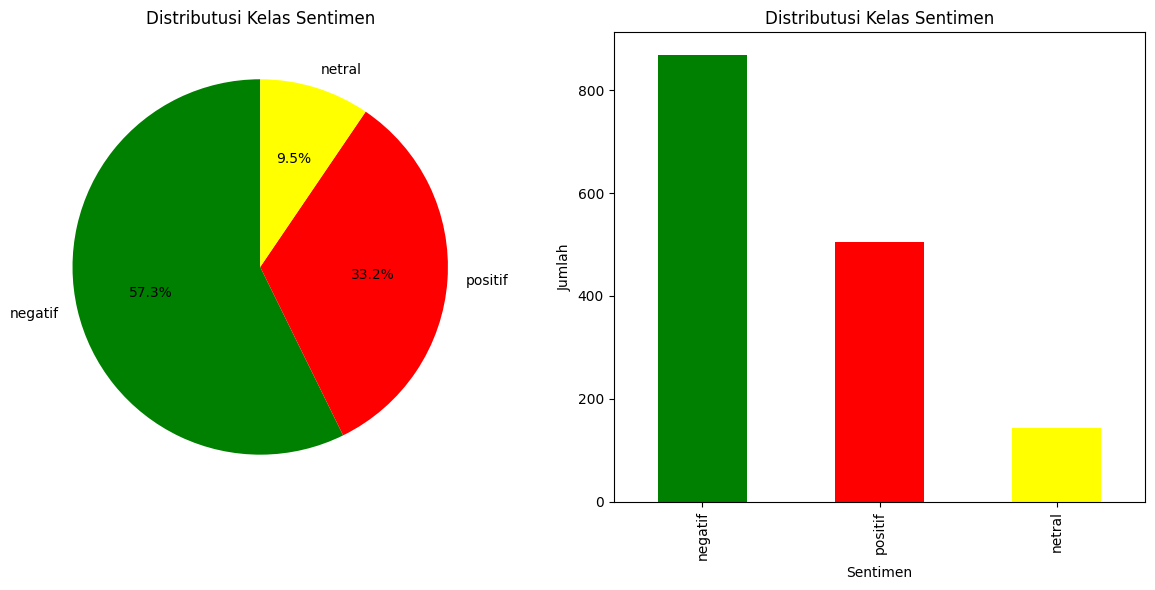

In [52]:
# Assuming 'data' is your DataFrame with a 'sentimen' column
sentimen_counts = data['sentimen'].value_counts()

# Create subplots with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart in the first subplot
axes[0].pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'yellow'])
axes[0].set_title('Distributusi Kelas Sentimen')

# Plot the bar chart in the second subplot
sentimen_counts.plot(kind='bar', ax=axes[1], color=['green', 'red', 'yellow'])
axes[1].set_title('Distributusi Kelas Sentimen')
axes[1].set_xlabel('Sentimen')
axes[1].set_ylabel('Jumlah')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [53]:
le = LabelEncoder()
data['sentimen'] = le.fit_transform(data['sentimen'])

review_positif = data[data['sentimen'] == 0]
review_negatif = data[data['sentimen'] == 1]
review_netral = data[data['sentimen'] == 2]

# Display only 'text' and 'sentimen' columns
print("20 Sampel review positif\n", review_positif[['text', 'sentimen']][:20])
print("\n20 Sampel review negatif\n", review_negatif[['text', 'sentimen']][:20])
print("\n20 Sampel review netral\n", review_netral[['text', 'sentimen']][:20])


20 Sampel review positif
                              text  sentimen
1   problem subsidi kualitas d...         0
3   model jelek kwalitas buruk...         0
4   syarat   ngaco woy anak mu...         0
6   mol keren yah   berita   p...         0
7   proses kenal produk baru b...         0
9   adil rata terima subsidi j...         0
10    tepat sasar donk syarat ...         0
11  mungkin subsidi baik arah ...         0
13  banyak kenderaan buat tion...         0
15                     tahan th           0
17  kendaran plg rawan bakar  ...         0
18    buat hari   sih sangat g...         0
20  subsidi motor   jalan umum...         0
21  apa sieh kok mbulet asli y...         0
22  buat larang jual kendara k...         0
26  contohin dulu semua menter...         0
27  sedia station charging mas...         0
28  subsidi bbm cabut mahal tr...         0
34  pake atur   buat jd laku  ...         0
36  aneh banget subsidi kendar...         0

20 Sampel review negatif
                        

In [54]:
data['text'] = data['text'].fillna('')

# Case Folding

Case folding adalah salah satu bentuk text preprocessing yang paling sederhana dan efektif meskipun sering diabaikan. Tujuan dari case folding untuk mengubah semua huruf dalam dokumen menjadi huruf kecil. Hanya huruf ‘a’ sampai ‘z’ yang diterima. Karakter selain huruf dihilangkan dan dianggap delimiter.

In [55]:
def caseFolding(text):
    # Mengubah teks menjadi lowercase
    text = text.lower()
    
    # Menghapus angka
    text = re.sub(r'\d+', '', text)
    
    # Menghapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Menghapus whitespace
    text = ' '.join(text.split())
    
    return text

In [56]:
# Melakukan case folding pada kolom 'text' dalam DataFrame
data['text'] = data['text'].apply(caseFolding)

# Menampilkan DataFrame setelah pemrosesan teks
print(data['text'])

0       saran sih bikin harga ioni...
1       problem subsidi kualitas d...
2       baik kualitas kembang dulu...
3       model jelek kwalitas buruk...
4       syarat ngaco woy anak muda...
5       harga motor mahal masa har...
6       mol keren yah berita plus ...
7       proses kenal produk baru b...
8                 subsidi tepat sasar
9       adil rata terima subsidi j...
10      tepat sasar donk syarat be...
11      mungkin subsidi baik arah ...
12      kampung sekarang banyak ba...
13      banyak kenderaan buat tion...
14                harga terlalu mahal
15                           tahan th
16                 iklan kudu kencang
17      kendaran plg rawan bakar m...
18      buat hari sih sangat guna ...
19      bapak luhut panjaitan yth ...
20      subsidi motor jalan umum t...
21      apa sieh kok mbulet asli y...
22      buat larang jual kendara k...
23          tambah bikin rakyat susah
24      ekosistem siap malah maksa...
25      jual ev naik jual genset b...
26      cont

In [57]:
# # Create a Stemmer instance
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# # Apply stemming to the 'text' column
# data['text'].apply(lambda x: stemmer.stem(x))